<a href="https://colab.research.google.com/github/zychen1017/Other/blob/main/%E2%80%9CVisualizing_Model_Performance_with_Bank_Data_ipynb%E2%80%9D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##  Bank Marketing

**Abstract:**
The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe to a term deposit (variable y).

**Data Set Information:**
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to assess if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

###  Attribute Information:

####  Bank client data:

 - Age (numeric)
 - Job : type of job (categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')
 - Marital : marital status (categorical: 'divorced', 'married', 'single', 'unknown' ; note: 'divorced' means divorced or widowed)
 - Education (categorical: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school',  'illiterate', 'professional.course', 'university.degree', 'unknown')
 - Default: has credit in default? (categorical: 'no', 'yes', 'unknown')
 - Housing: has housing loan? (categorical: 'no', 'yes', 'unknown')
 - Loan: has personal loan? (categorical: 'no', 'yes', 'unknown')

    
####  Related with the last contact of the current campaign:

 - Contact: contact communication type (categorical:
   'cellular','telephone')
 - Month: last contact month of year (categorical: 'jan', 'feb', 'mar',
   ..., 'nov', 'dec')
 - Duration: last contact duration, in seconds (numeric). Important
   note: this attribute highly affects the output target (e.g., if
   duration=0 then y='no'). Yet, the duration is not known before a call
   is performed. Also, after the end of the call y is obviously known.
   Thus, this input should only be included for benchmark purposes and
   should be discarded if the intention is to have a realistic
   predictive model.

    
####  Other attributes:

 - Campaign: number of contacts performed during this campaign and for
   this client (numeric, includes last contact)
 - Pdays: number of days that passed by after the client was last
   contacted from a previous campaign (numeric; 999 means client was not
   previously contacted)
 - Previous: number of contacts performed before this campaign and for
   this client (numeric)
 - Poutcome: outcome of the previous marketing campaign (categorical:
   'failure','nonexistent','success')

####  Output variable (desired target):

 - y - has the client subscribed a term deposit? (binary: 'yes', 'no')

     
###  Source:

 - Dataset from : http://archive.ics.uci.edu/ml/datasets/Bank+Marketing#


### Import the necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#to scale the data using z-score
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

#algorithms to use
from sklearn.linear_model import LogisticRegression

#Metrics to evaluate the model
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve

#to ignore warnings
import warnings
warnings.filterwarnings("ignore")

### Read in the data set using the code:
```
#reading the dataset
import pandas as pd
import requests
from io import StringIO  

orig_url="-----" # copy and paste a Goodle drive share link to the data
file_id = orig_url.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url = requests.get(dwn_url).text

csv_raw = StringIO(url)
bank = pd.read_csv(csv_raw, sep=';') # the sep argument indicates how the data values are separated
```

In [ ]:
#reading the dataset
import pandas as pd
import requests
from io import StringIO

orig_url="https://drive.google.com/file/d/1IZQz-1sZtD7R2VVe_JuhWRf5vAMa-B2E/view?usp=sharing"
file_id = orig_url.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url = requests.get(dwn_url).text

csv_raw = StringIO(url)
bank = pd.read_csv(csv_raw, sep=';') # the sep argument indicates how the data values are separated

### Examine the first few lines of the data set using the method

```data_frame.head()```

In [ ]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### Examine the data information using the method
```data_frame.info()```

In [ ]:
# take a look at the type, number of columns, entries, null values etc..
bank.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


### Check for missing values using the method
```data_frame.isnull().any()```

In [ ]:
bank.isnull().any() # one way to search for null values

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
y            False
dtype: bool

### Separate the numerical and categorical variables
They will be treated differently in preprocessing and in visualization

In [ ]:
# separate the numerical columns
# 'age', 'duration','campaign','pdays', 'previous'

num_cols=['age', 'duration','campaign','pdays', 'previous']

In [ ]:
# separate the categorical columns
# 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y'

cat_cols=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y'
]

### Examine the first few rows of the numerical data

In [ ]:
bank[num_cols]

,age,duration,campaign,pdays,previous
0,58,261,1,-1,0
1,44,151,1,-1,0
2,33,76,1,-1,0
3,47,92,1,-1,0
4,33,198,1,-1,0
...,...,...,...,...,...
45206,51,977,3,-1,0
45207,71,456,2,-1,0
45208,72,1127,5,184,3
45209,57,508,4,-1,0


### Run a statistical summary of the numerical data

In [ ]:
bank[num_cols].describe()

,age,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,258.163080,2.763841,40.197828,0.580323
std,10.618762,257.527812,3.098021,100.128746,2.303441
min,18.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,4918.000000,63.000000,871.000000,275.000000


### Examine the first few rows of the categorical data


In [ ]:
bank[cat_cols].head()

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no


### Creating dummy variables for the categorical variables.

Before doing so, check for the unique values in the column using the ```unique()``` method. The variables with only two values will be handled differently (note that this separation is not a requirement, merely conventional).

```data_frame['column'].unique()```

In [ ]:
bank['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [ ]:
bank['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [ ]:
bank['education'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [ ]:
bank['contact'].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [ ]:
bank['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [ ]:
bank['poutcome'].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

### Get dummies for ```'job', 'marital', 'education', 'contact', 'month', 'poutcome'```
Use the ```get_dummies()``` method for the variables with more than two categories. Reassign the bank data frame so that it has the newly transformed variables.
```
data_frame=pd.get_dummies(data=data_frame, columns=categorical_columns, drop_first=True)
```

In [ ]:
#creating list of dummy columns
cat_cols_dummies=['job', 'marital', 'education', 'contact', 'month', 'poutcome']

#creating dummy variables and reassigning the data frame
bank = pd.get_dummies(data = bank, columns= cat_cols_dummies, drop_first= True)


### Convert ```yes', 'no'``` to ```0, 1```
For categorical variables with 'yes' or 'no' values, convert the 'yes' to 1 and the 'no' values to 0.

In [ ]:
bank['default'].unique()

array(['no', 'yes'], dtype=object)

In [ ]:
bank['housing'].unique()

array(['yes', 'no'], dtype=object)

In [ ]:
bank['loan'].unique()

array(['no', 'yes'], dtype=object)

In [ ]:
bank['y'].unique()

array(['no', 'yes'], dtype=object)

In [ ]:
dict_default={'yes': 1, 'no':0}
dict_housing={'yes': 1, 'no':0}
dict_loan={'yes': 1, 'no':0}
dict_y={'yes': 1, 'no':0}

bank['default']=bank.default.map(dict_default)
bank['housing']=bank.housing.map(dict_housing)
bank['loan']=bank.loan.map(dict_loan)
bank['y']=bank.y.map(dict_y)


### Examine the first few lines of the bank data *set*

In [ ]:
bank.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,261,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
1,44,0,29,1,0,5,151,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
2,33,0,2,1,1,5,76,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
3,47,0,1506,1,0,5,92,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
4,33,0,1,0,0,5,198,1,-1,0,...,0,0,0,1,0,0,0,0,0,1


Check again for missing values and data types.

In [ ]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   default              45211 non-null  int64
 2   balance              45211 non-null  int64
 3   housing              45211 non-null  int64
 4   loan                 45211 non-null  int64
 5   day                  45211 non-null  int64
 6   duration             45211 non-null  int64
 7   campaign             45211 non-null  int64
 8   pdays                45211 non-null  int64
 9   previous             45211 non-null  int64
 10  y                    45211 non-null  int64
 11  job_blue-collar      45211 non-null  uint8
 12  job_entrepreneur     45211 non-null  uint8
 13  job_housemaid        45211 non-null  uint8
 14  job_management       45211 non-null  uint8
 15  job_retired          45211 non-null  uint8
 16  job_self-employed    4

Notice that all variables have 45,211 non-null values and that all of the data types are numerical. (watch out for `object` data types)

### Separate the feature variables from the target variable.

In [ ]:
#Separating target variable and other variables
y= bank['y']
X= bank.drop(columns = ['y'])

### Scaling the data

The independent variables in this dataset have different scales. When features have differing scales from each other, there is a chance that a higher weightage will be given to features which have a higher magnitude, and they will dominate over other features whose magnitude changes may be smaller but whose percentage changes may be just as significant or even larger. This will impact the performance of our machine learning algorithm, and we do not want our algorithm to be biased towards one feature.

The solution to this issue is **Feature Scaling**, i.e. scaling the dataset so as to give every transformed variable a comparable scale.

In this problem, we will use the **Standard Scaler** method, which centers and scales the dataset using the Z-Score.

It standardizes features by subtracting the mean and scaling it to have unit variance.

The standard score of a sample x is calculated as:

**z = (x - u) / s**

where **u** is the mean of the training samples (zero) and **s** is the standard deviation of the training samples.

### Run the standard scalar to transform the values in the collection of feature values.
```
#Scaling the data
sc=StandardScaler() # imported with the libraries, we give it an alias here

X_scaled=sc.fit_transform(X)
X_scaled=pd.DataFrame(X_scaled, columns=X.columns)
```

In [ ]:
#Scaling the data
sc=StandardScaler() # imported with the libraries, we give it an alias here
X_scaled=sc.fit_transform(X)
X_scaled=pd.DataFrame(X_scaled, columns=X.columns)

### Splitting the data into 70% train and 30% test set

Some classification problems can exhibit a large imbalance in the distribution of the target classes: for instance there could be several times more negative samples than positive samples. In such cases it is recommended to use the **stratified sampling** technique to ensure that relative class frequencies are approximately preserved in each train and validation fold.

In [ ]:
#splitting the data
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=1,stratify=y)

### Model evaluation criterion

#### The model can make two types of wrong predictions:
1. Predicting an customer will subscribe and the don't
2. Predicting a customer will not subscribe and they do.

Also, let's create a function to calculate and print the classification report and confusion matrix so that we don't have to rewrite the same code repeatedly for each model.

In [ ]:
#creating metric function
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Subscribe', 'Subscribe'], yticklabels=['Not Subscribe', 'Subscribe'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

### Logistic Regression Model

- Logistic Regression is a supervised learning algorithm which is used for **binary classification problems** i.e. where the dependent variable is categorical and has only two possible values. In logistic regression, we use the sigmoid function to calculate the probability of an event y, given some features x as:

                                          P(y)=1/exp(1 + exp(-x))

In [ ]:
#fitting logistic regression model
lg=LogisticRegression()
lg.fit(X_train,y_train)

LogisticRegression()

**Checking model performance**

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     27945
           1       0.66      0.36      0.46      3702

    accuracy                           0.90     31647
   macro avg       0.79      0.67      0.70     31647
weighted avg       0.89      0.90      0.89     31647



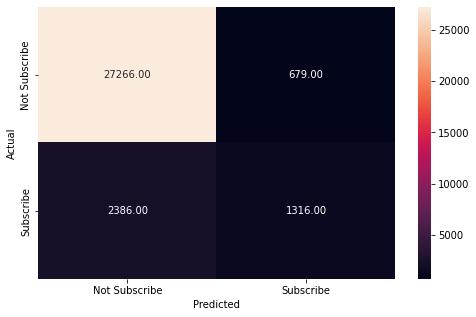

In [ ]:
#checking the performance on the training data
y_pred_train = lg.predict(X_train)
metrics_score(y_train, y_pred_train)

              precision    recall  f1-score   support

           0       0.92      0.97      0.95     11977
           1       0.63      0.34      0.44      1587

    accuracy                           0.90     13564
   macro avg       0.78      0.66      0.69     13564
weighted avg       0.88      0.90      0.89     13564



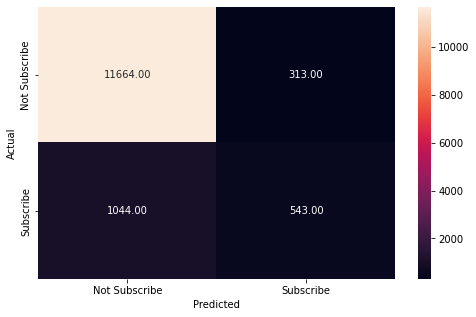

In [ ]:
#checking the performance on the test dataset
y_pred_test = lg.predict(X_test)
metrics_score(y_test, y_pred_test)

#### Observations
- The accuracy on the training and testing sets is close to 90% suggesting good overall performance and good model generalization
- The Recall is quite low while the Precision is somewhat higher.

**Let's check the coefficients and find which variables are leading to subscription and which can help to increase subscription**

The coefficients of the logistic regression model give us the log of odds, which is hard to interpret in the real world. We can convert the log of odds into real odds by taking its exponential.

In [ ]:
#printing the coefficients of logistic regression
cols=X.columns

coef_lg=lg.coef_

pd.DataFrame(coef_lg,columns=cols).T.sort_values(by=0,ascending=False)

# Convert the log odds to simple odds
odds = np.exp(lg.coef_[0]) #finding the odds

# adding the odds to a dataframe and sorting the values
pd.DataFrame(odds, X_train.columns, columns=['odds']).sort_values(by='odds', ascending=False)

,odds
duration,2.996988
poutcome_success,1.533149
education_tertiary,1.191026
month_mar,1.178660
month_jun,1.169647
month_sep,1.117089
month_oct,1.113323
education_secondary,1.108608
job_retired,1.095348
day,1.069098


#### Observations:
Features with notable positive affect on the subscription rate.

- duration
- poutcome_success
- education_tertiary
- month_mar
- month_jun
- month_sep
- month_oct
- education_secondary

In general, longer duration of contact with a customer is associated with an increase in the probability that a custmer will subscribe. If the previous outcome of targeting a customer was successful, there is an increased probability of success on the next campaign.

### Precision-Recall Curve for Logistic Regression
------
A technique that can be used to balance the precision and recall of the model relies on the precision-recall curve. This helps the analyst determine an ideal probability threshold for classifying customers as subscribers based on the model.

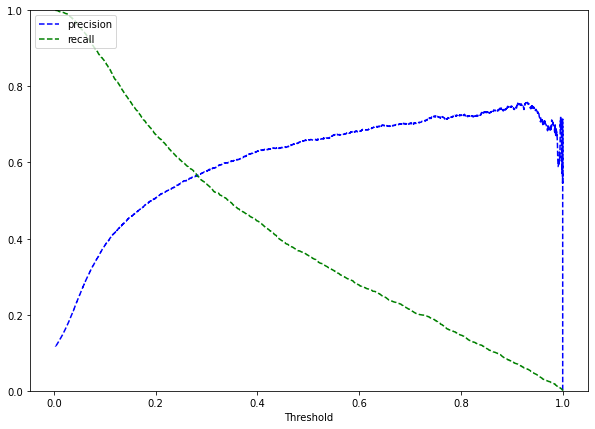

In [ ]:
y_scores_lg=lg.predict_proba(X_train) #predict_proba gives the probability of each observation belonging to each class


precisions_lg, recalls_lg, thresholds_lg = precision_recall_curve(y_train, y_scores_lg[:,1])

#Plot values of precisions, recalls, and thresholds
plt.figure(figsize=(10,7))
plt.plot(thresholds_lg, precisions_lg[:-1], 'b--', label='precision')
plt.plot(thresholds_lg, recalls_lg[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()

### **Exercise 1: Observations based on the precision-recall curve**
We can see that precision and recall are balanced for a threshold of about ~**0.30**.
**what is the meaning of the 0.30 threshold?**

- **A threshold of 0.30 means that if the probability score for an instance is greater than 0.30, you classify it as positive, and if it's less than or equal to 0.30, you classify it as negative.**



**Let's find out the performance of the model at this threshold**

              precision    recall  f1-score   support

           0       0.94      0.95      0.94     27945
           1       0.58      0.54      0.56      3702

    accuracy                           0.90     31647
   macro avg       0.76      0.75      0.75     31647
weighted avg       0.90      0.90      0.90     31647



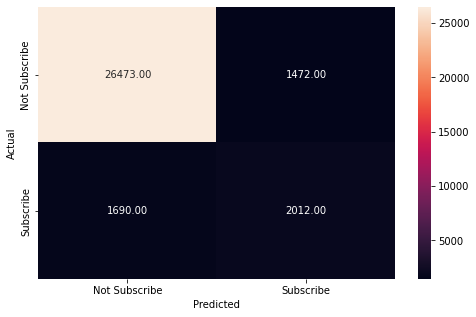

In [ ]:
optimal_threshold1=.30
y_pred_train = lg.predict_proba(X_train)
metrics_score(y_train, y_pred_train[:,1]>optimal_threshold1)

- **The model performance has improved. The recall has increased significantly for class 1.**
- Let's check the performance on the test data.

              precision    recall  f1-score   support

           0       0.94      0.95      0.94     11977
           1       0.58      0.54      0.56      1587

    accuracy                           0.90     13564
   macro avg       0.76      0.75      0.75     13564
weighted avg       0.90      0.90      0.90     13564



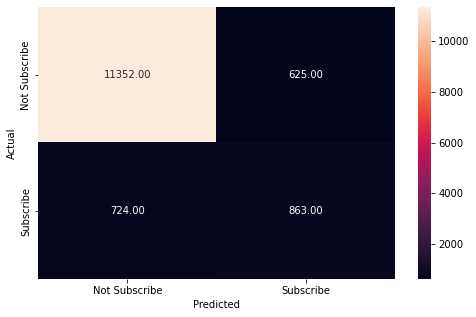

In [ ]:
optimal_threshold1=.30
y_pred_test = lg.predict_proba(X_test)
metrics_score(y_test, y_pred_test[:,1]>optimal_threshold1)

### **Exercise 2: Observations based on the model at threshold 0.30**
- **At a threshold of 0.30, the model achieves high precision (0.94) and recall (0.95) for class 0, indicating accurate predictions and capturing a majority of instances correctly.**
- **However, for class 1, precision (0.58) and recall (0.54) are lower, suggesting the model's difficulty in accurately identifying instances of this class, potentially indicating a class imbalance issue.**
- **With a cutoff threshold of 0.3, the model demonstrates improved precision and recall compared to previous evaluations.**

### Practical Model Evaluation: Cost, Profit, and Revenue
------
- Cost of targeting a customer: $10.   

- Profit if a customer subscribes to a term deposit: $100

We can use this information in combination with what we know about the total number of customers and the number of those customers who have subscribed to a term deposit in the past.

In [ ]:
#Calculating “Average profit per customer” for reaching out to all the customers in training data
print("The number of customers to be reached out to are:",len(y_train))

# Determine the number of subscribers, count all records where class = 1
print("Number of responders are:",y_train.value_counts()[1],"\n")

# Determine the total cost of contacting all customers if cost per custmer is $10
print("Cost of reaching out to customers: $",len(y_train)*10)

# Determine the total revenue if each subscriber earns the company $100
print("Revenue: $",y_train.value_counts()[1]*100)

# Determin the profit by subtracting the cost from the revenue
print("Profit (revnue - cost):$",y_train.value_counts()[1]*100-len(y_train)*10)

#without any model,company would be at a loss

The number of customers to be reached out to are: 31647
Number of responders are: 3702 

Cost of reaching out to customers: $ 316470
Revenue: $ 370200
Profit (revnue - cost):$ 53730


### Exercise 3: Interpreting Cost and Profit
The results above show the costs of reaching out to every customer. **Discuss the results from the perspective of the bank and suggest a course of action for improving the outcome of the marketing campaign.**
    
- **----**        


Next we perform a Logistic Regression on the training data using the predicted probability of a customer subscribing to calculate the Cost, Revenue, Profit and Return on Investment (ROI) for each probability value at an interval of 0.01.  
    
\begin{align}
    ROI = \frac{Profit}{Cost}*100
\end{align}

The function below takes “Actual outcome”, “Predicted probability of subscription”, “Cost per individual”, “Revenue per individual”, “Range of probabilities to check” as input.

In [ ]:
from sklearn.metrics import confusion_matrix
def cost_funciton(y_Actual, y_Predicted, cost_per_individual,
                  revenue_per_individual, low_threshold, high_threshold):
    cost_function_output = pd.DataFrame()
    for threshold in np.arange(low_threshold, high_threshold, 0.01):
        confusion_out = confusion_matrix(y_Actual, np.where(y_Predicted>threshold,1,0))
        target_populaion=round((confusion_out[1][1]+confusion_out[0][1])/len(y_Actual),4)
        responders_in_target_populaiton=round(confusion_out[1][1]/(len(y_Actual)),4)
        cost=(confusion_out[1][1]+confusion_out[0][1])*cost_per_individual
        revenue=confusion_out[1][1]*revenue_per_individual
        profit=revenue-cost
        ROI=round(profit/cost*100,0)
        cost_function_output=cost_function_output.append([[threshold,
                                                           responders_in_target_populaiton*100,
                                                           target_populaion*100,
                                                           revenue,
                                                           cost,
                                                           profit,
                                                           ROI]])
    return cost_function_output

Below is a call for the above function with training data as input and using the estimated cost and revenue per individual as determined by the manager.

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred=logreg.predict_proba(X_train)[:,1]

# Call the function with inputs y_train, y_pred, cost to target, profit per subscriber, low probability threshold, high probability threshold
cost_function_output=cost_funciton(y_train, y_pred , 10, 100, 0.25, 0.75)
my_columns = ["Probability of Subscription",  "% Responders_in_target_populaiton",
              "% Target_population", "Revenue", "Cost",  "Profit","ROI"]
cost_function_output.columns = my_columns
cost_function_output

,Probability of Subscription,% Responders_in_target_populaiton,% Target_population,Revenue,Cost,Profit,ROI
0,0.25,7.07,12.95,223800,40980,182820,446.0
0,0.26,6.93,12.54,219300,39700,179600,452.0
0,0.27,6.82,12.17,215700,38520,177180,460.0
0,0.28,6.65,11.76,210400,37210,173190,465.0
0,0.29,6.47,11.33,204900,35850,169050,472.0
0,0.30,6.36,11.01,201200,34840,166360,477.0
0,0.31,6.22,10.66,196900,33740,163160,484.0
0,0.32,6.10,10.35,192900,32750,160150,489.0
0,0.33,5.99,10.07,189700,31880,157820,495.0
0,0.34,5.88,9.83,186200,31100,155100,499.0


Here “Probability of Subscription” is considered as cut off for segregating if the customer will subscribe or not subscribe. We can observe that as the “Probability of Subscription” increases,“% Target population” decreases, which means considering higher probability as a cut off leads to segregating a smaller number of customers as the target population. But the interesting fact is as the “Probability of Subscription” increases, the “ROI” increases which means though we are targeting a smaller population we are getting good results as compared to targeting a larger population, which can also be seen in the below graph.

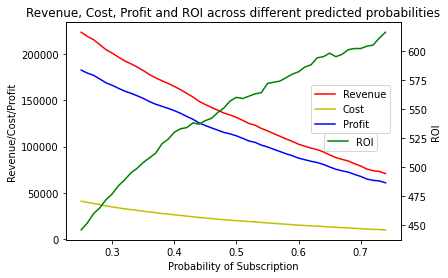

In [ ]:
fig, ax1 = plt.subplots()
ax1.plot(cost_function_output["Probability of Subscription"],cost_function_output["Revenue"], color='r')
ax1.plot(cost_function_output["Probability of Subscription"],cost_function_output["Cost"],color='y')
ax1.plot(cost_function_output["Probability of Subscription"],cost_function_output["Profit"],color='b')
ax1.set_xlabel('Probability of Subscription')
ax1.set_ylabel('Revenue/Cost/Profit')
ax1.legend(["Revenue", "Cost", "Profit"],loc='center',bbox_to_anchor=(0.85, 0.6))

ax2 = ax1.twinx()
ax2.plot(cost_function_output["Probability of Subscription"],cost_function_output["ROI"],color='g')
ax2.set_ylabel('ROI')
ax2.legend(['ROI'],loc='center',bbox_to_anchor=(0.85, 0.45))

plt.title("Revenue, Cost, Profit and ROI across different predicted probabilities")
plt.show()

### Exercise 4: Graphical Interpretations
**Interpret the graphic. How does the information provided by this visual help you in optimizing the predictive model?**

- **----**     

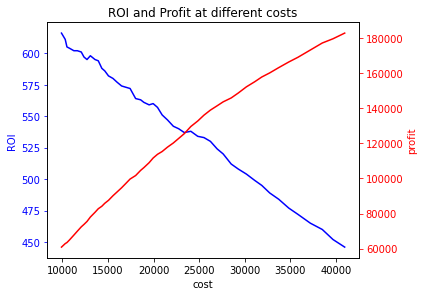

In [ ]:
fig, ax1 = plt.subplots()
ax1.plot(cost_function_output["Cost"],cost_function_output["ROI"],color='b')
ax1.set_xlabel('cost')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('ROI', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
ax2.plot(cost_function_output["Cost"],cost_function_output["Profit"], color='r')
ax2.set_ylabel('profit', color='r')
ax2.tick_params('y', colors='r')

fig.tight_layout()
plt.title("ROI and Profit at different costs")
plt.show()

#as cost increases ROI decreases and profit increases
#if max profit,
#if max ROI
#sweet spot

### **Exercise 5: Practical Recommendations**
5.a. Describe how the ROI is related to the cost.
- **----**   

  
5.b.  Describe how the profit is related to the cost.
- **----**   

   
5.c. What would be the cost involved in Profit-ROI equilibrium point?  
- **----**     
